# Methods in Python

In this section we will talk about methods, aka functions that lives on the instance or the class. We will see that there are a number of ways that you can defined methods on a class and you should use them in different situations.


## Attributes, Fields, Methods

Classes are custom data types, and are extremely central to object-oriented programming. When you are developing object-oriented code, most of your development will go into defining classes and how they interact.

When defining a new class, you need to specify what data an object of that type should contain, and what functionality it has. We call these the *attributes* of the class/object, and these can be split into two main groups:
* *fields* are pieces of data stored in the object
* *methods* are functions we can call

In Python we use the dot-syntax to access an objects attributes. For example

In [1]:
x = complex(4, 3)

print(x.real)
print(x.imag)
print(x.conjugate())

4.0
3.0
(4-3j)


Here we create a `complex`-type object, which represents a complex number. We can then access its real and imaginary components using the names `x.real` and `x.imag`. These are examples of attributes of object, in this case these are `float` attributes, which in turn are examples of data fields.

Last we use `x.conjugate()`, and this is also a class attribute - but in this case the attribute is callable and will behave as a function. Such attributes we call *methods* in Python. In this case the method returns the complex conjugate of the object.

In [2]:
print(type(x.real))
print(type(x.conjugate))

<class 'float'>
<class 'builtin_function_or_method'>


## Special Methods

In Python, defining classes often involve implementing *special* methods, also known as *magic* methods (or dunder methods). These are methods we do not expect to call explicitly. Rather, we expect Python to call them for us as needed, depending on the situation. They are extremely useful to learn how to use, and they lead to elegant, understandable and usable code. Becoming adept at special methods is crucial if you want to make good Pythonic code.

Special methods have specific names, so Python knows what to call. They all use two leading and two trailing underscores. You have already seen an example of this, the constructor: `__init__`.


### The constructor (`__init__`)

You have already seen the most important example of special methods, the constructor, or initialization special method (`__init__`). This function is called every time you define a new instance of a class.

In [3]:
from math import pi


class Sphere:
    def __init__(self, radius):
        self.radius = radius
        self.area = 4 * pi * radius**2
        self.volume = 4 * pi * radius**3 / 3


football = Sphere(11)
print(f"A football of radius {football.radius:.0f} cm")
print(f"Has a surface area of {football.area:.0f} cm^2")
print(f"And a volume of {football.volume:.0f} cm^3")

A football of radius 11 cm
Has a surface area of 1521 cm^2
And a volume of 5575 cm^3


Once we define a new instance of the class, the `__init__`-method is called behind the scenes. As usual, the first argument is called "self", because this will be the object itself. In addition we send in any additional arguments we need to define an object of the given class. In this example we define a sphere-object, and so we send in the radius as an argument. In our constructor we then choose to store the radius as a data attribute by writing

In [4]:
self.radius = radius

NameError: name 'radius' is not defined

This code line might look a bit weird, but here we are defining the instance property `football.radius`, and setting the value to be the same as the function argument (`11`). In addition to storing the radius, we have chosen to also compute the area and volume of the sphere, and store these as attributes as well.

(python-oop-special-print)=
### Printing out instances of custom classes

If you attempt to call `print` on a custom object, you'll find that it doesn't produce output that is super helpful.

In [5]:
print(football)

Reading the output we get out the type, in this case `__main__.Sphere` (main because we defined it in our main script, and didn't import it), it tells us it is an object, and then it specifies where in memory the object is stored. The object type can in many cases be useful information, but you could already get this information by using the `type()` function.

To print more useful information, we can implement the string special method (`__str__`). This special method is called automatically for us when we try to turn our custom object into a string by writing `str(u)`. In addition, when we call `print(u)`, Python actually first converts the object to a string behind the scenes before printing it (unlike for example `sys.stdout.write`, where you have to do it manually). So if we implement `Football.__str__` we would get the following happening behind the scenes

* `print(football)` -> `print(str(football))` -> `print(football.__str__())`

This means: if we implement a `__str__` that returns a nicely formatted string, we can print our object exactly the way we want it.

In [6]:
from math import pi


class Sphere:
    def __init__(self, radius):
        self.radius = radius
        self.area = 4 * pi * radius**2
        self.volume = 4 * pi * radius**3 / 3

    def __str__(self):
        return f"Sphere({self.radius})"


football = Sphere(11)
print(football)

Sphere(11)


A different special method that is similar to the string method is the representation special method (`__repr__`). The main difference is that `__str__` is meant to be human readable, so that it works with `print()`. This means that `__str__` can be informal, and ambiguous, as long as it is somewhat informative.

On the other hand we have `__repr__`, which is meant to be unambiguous and more formal. It should be a unique representation of the object so that it could be used to recreate that object later. When calling `repr(u)` we should get a string that we for example can write to a file, then later load in and execute that statement to get the object back. So `eval(repr(u))` should give `u`.

The repr special method is also called when printing out elements inside a list for example, so if we write out our football inside a list, the output will be as before, despite having implemented a str-method. To fix this we would need to add a repr instead, or in addition to, the str-method.

In [7]:
list_of_spheres = [Sphere(0), Sphere(5), Sphere(10)]
print(list_of_spheres)

[<__main__.Sphere object at 0x7f4c40954c40>, <__main__.Sphere object at 0x7f4c40957e20>, <__main__.Sphere object at 0x7f4c40955f30>]


Now let us implement the `__repr__` method

In [8]:
from math import pi


class Sphere:
    def __init__(self, radius):
        self.radius = radius
        self.area = 4 * pi * radius**2
        self.volume = 4 * pi * radius**3 / 3

    def __str__(self):
        return f"Sphere({self.radius})"

    def __repr__(self):
        return str(self)

Here we use a quick little trick. Because we don't really want `__repr__` and `__str__` to produce any different output, we simply let `__repr__` use the string special method by writing `self(str)`. Using methods internally when defining classes is very common, and can save us a lot of hassle

In [9]:
list_of_spheres = [Sphere(0), Sphere(5), Sphere(10)]
print(list_of_spheres)

[Sphere(0), Sphere(5), Sphere(10)]


### Making callable objects

Another important special method is the *call* method (`__call__`). If a class has an implemented call method, we can call a given object as though it were a function. This is because Python automatically will use the call-method behind the scenes. This is extremely useful when we want to create objects that represent mathematical functions.

Say for example we want to make a class for quadratic functions, which can be written as

$$
f(x) = ax^2 + bx + c.
$$

Here, there a three free parameters, the coefficients $a$, $b$, and $c$. We therefore let the constructor take these in. We then implement the mathematical function itself as the call special method:

In [10]:
class Quadratic:
    def __init__(self, a, b, c):
        self.coefficients = a, b, c

    def __call__(self, x):
        a, b, c = self.coefficients
        return a * x**2 + b * x + c


f = Quadratic(1, 2, 1)
print(f(4))

25


Here, when we assign `f = Quadratic(1, 2, 1)`, we are creating a new object of the class that represents the function $f(x) = x^2 + 2x + 1$. It isn't actually a Python function, but it is *callable*. We can therefore use it as if it were a normal function and call it by writing `f(4)`. When we write this, Python interprets it behind-the-scenes as

* `f(4)` -> `f.__call__(4)` -> `Quadratic.__call__(f, 4)`

We can now easily create quadratic functions and use them as normal functions:

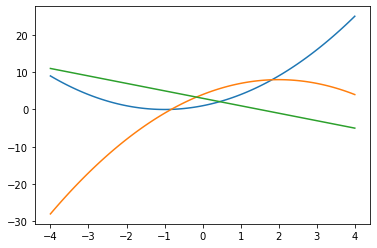

In [11]:
import numpy as np
import matplotlib.pyplot as plt

f = Quadratic(1, 2, 1)
g = Quadratic(-1, 4, 4)
h = Quadratic(0, -2, 3)

x = np.linspace(-4, 4, 101)
plt.plot(x, f(x))
plt.plot(x, g(x))
plt.plot(x, h(x))
plt.show()

There are several advantages to implementing these quadratic functions as actual Quadratic-objects, rather than as normal Python functions. For one, they now have a custom type, which we can check using `isinstance(f, Quadratic)`. Thus, other parts of our code can *know* that the function is a quadratic function. We can also extend the class adding plenty of useful functionality. We could for example add functionality for adding or subtracting functions, producing new Quadratic-objects. This cannot be done with normal functions. Or we could add a method for returning the derivative. If you do this week's exercises, you will get the chance to implement all of these for a general degree polynomial.


### More Special Methods

So far, we have shown the following special methods
* `__init__`
* `__str__`
* `__repr__`
* `__call__`

These are just a few of many, many possible special methods you can implement. We will look at more example in the next lecture. For a more comprehensive list and more examples, you can check out [this site](http://www.diveintopython3.net/special-method-names.html).


## Class Methods and Variables

In most examples we have seen in the course so far, we first implement a class, and then create *instances* of that class, i.e., objects of that class type. However, once created, these objects do not affect each other directly, they are simply the same type of object.

However, it is possible to create variables that belong to the *class*, and not specific objects.

### Three common uses of class variables and class methods are:
* To keep track of the number of objects created of a class
* To store global parameters, that should be the same for all instances
* So-called 'factory methods', which creates new objects in different ways than what is commonly done in the constructor

For the first example, we simply keep a counter running that increases every time we create a new object of the class:

In [12]:
class Rabbit:
    nr_of_rabbits = 0

    def __init__(self, age):
        Rabbit.nr_of_rabbits += 1
        self.age = age


print(Rabbit.nr_of_rabbits)

alice = Rabbit(2)
buddy = Rabbit(4)
charlie = Rabbit(7)

print(Rabbit.nr_of_rabbits)

0
3


Here, `nr_of_rabbits` is a class variable, because it belongs to the class itself. The `age` attributes however, are *instance* variables, as they belong to each individual instance of the class. In the constructor of the class, we increment `Rabbit.nr_of_rabbits` by 1, thus, each time a new rabbit object is created, this variable grows.

Note that even though there is no *instance* variable called `nr_of_rabbits`, we can access it from the objects too:

In [13]:
print(alice.nr_of_rabbits)

3


This is because when we write `alice.nr_of_rabbits`, Python first checks for a instance variable by this name, but if none is found, like in this case, then it instead uses the class variable.

However, you should be a bit careful here, because if we try to redefine `alice.nr_of_rabbits` (or `self.nr_of_rabbits` inside the constructor), then we actually create an instance variable, rather than change the class variable. This is why we write `Rabbit.nr_of_rabbits += 1`, rather than self. Let us try the other version and see what happens:

In [14]:
class Rabbit:
    nr_of_rabbits = 0

    def __init__(self, age):
        self.age = age
        self.nr_of_rabbits += 1  # Intentionally wrong!


alice = Rabbit(2)
buddy = Rabbit(4)
charlie = Rabbit(7)

print(Rabbit.nr_of_rabbits)
print(alice.nr_of_rabbits)

0
1


Obviously, this does not behave as we expect. We want `nr_of_rabbits` to be 3, since we created 3 rabbits. But we see that the class variable `Rabbit.nr_of_rabbits` reports 0 rabbits, and `alice.nr_of_rabbits`, which should just default to the class variable reports 1 rabbit!  What is actually happening here?

When we write:

In [15]:
self.nr_of_rabbits += 1

NameError: name 'self' is not defined

This is equivalent to writing

In [16]:
self.nr_of_rabbits = self.nr_of_rabbits + 1

NameError: name 'self' is not defined

Now the right hand side is evaluated first. When creating the object, the new rabbit has no `nr_of_rabbits` instance variable, so it looks up the class variable instead, which is 0, then we add 1, giving 1 as a result.

Now, this is supposed to be stored in the variable to the left of the assignment operator (`=`), but `self.nr_of_rabbits` is interpreted by Python as if we want to create this instance variable. Therefore, the new rabbit object gets its own personal `nr_of_rabbit` instance variable, and the class variable never gets updated.

Note that this happens because an integer is *immutable*. If we had a class variable that was mutable, then it would behave differently. We could for example contain all objects of a class in a list as a class variable:

In [17]:
class Rabbit:
    all_rabbits = []

    def __init__(self, name, age):
        self.name = name
        self.age = age
        self.all_rabbits.append(self)

    def __repr__(self):
        return f"{self.__class__.__name__}({self.name})"


Rabbit("Alice", 2)
Rabbit("Buddy", 4)
Rabbit("Charlie", 7)

Rabbit(Charlie)

In this case, writing `self.all_rabbits.append(self)` means we add the object itself to the class variable list. Because lists are mutable, we end up changing the class variable, instead of creating an instance variable. Although it works writing `self.all_rabbits` in this case, it isn't very readable for a user, as they might think this is a instance variable because of the `self`. So here, it would be better to just write out `Rabbit.all_rabbits`, or `self.__class__.all_rabbits`, to make it clear to the user that this is the class variable that is being changed.

### Parameters as class variables

Class variables are well suited for storing parameters that are usually shared by all objects of the class. Take for instance a Pendulum class

In [18]:
class Pendulum:
    G = 9.81

    def __init__(self, M=1, L=1):
        self.M = M
        self.L = L

In this class, we can create pendulums of different lengths and masses. We can then use `self.M` and `self.L` to refer to these in calculations. Note that we can also refer to `self.G` in calculations, but this will use the class variable `G`, as the objects contain no specific G. We let `G` be a class variable, because all our pendulums typically experience the same gravity.

In [19]:
p = Pendulum(M=4, L=2)
print(p.M)
print(p.L)
print(p.G)

4
2
9.81


One benefit of defining parameters that should be shared across all objects as a class variable is that it is now easy to change the parameter for all objects, those already created and those we create in the future.

In [20]:
Pendulum.G = 10
print(p.G)

10


Thus, the parameter has a single, definite representation in our system. Which is usually a good approach.

(class-methods)=
## Class Methods

In addition to defining class variables, we can define class methods. Class methods are methods we call on the *class*, not on a specific object. The easiest approach to creating a class method in Python is to use the `@classmethod` decorator. One of the typical use cases for a class method are *factory methods*. Factory methods are methods that create objects of the class, but perhaps in a different way than what the constructor does.

A Python class can only have one constructor. Creating objects in different ways is achieved through factory methods:

In [21]:
import numpy as np


class Sphere:
    def __init__(self, radius):
        self.radius = radius

    def volume(self):
        return 4 * np.pi * self.radius**3 / 3

    @classmethod
    def from_volume(cls, volume):
        radius = (3 * volume / (4 * np.pi)) ** (1 / 3)
        return cls(radius)

Here, we make our `Sphere` class as normal, where we create spheres by specifying their radius. However, sometimes, we might want to instead create a sphere with a given volume. To do this, we create a *factory method*. We then use the `@classmethod` decorator to create it, for normal *instance* methods, the first argument to a method is always the self, but now we call the first argument is `cls`, which is short for "class".

We can use the class method as follows:

In [22]:
ball = Sphere.from_volume(5000)
print(f"Radius: {ball.radius:.1f} \t Volume: {ball.volume():.1f}")

Radius: 10.6 	 Volume: 5000.0


Here, because we defined the method as a class method,
``` Python
Sphere.from_volume(5000)
```
is actually interpreted as
``` Python
Sphere.from_volume(Sphere, 5000)
```
And so `cls` would refer to the class itself within the class method, exactly like `self`  refers to the object itself in normal instance methods.

A common usage of factory methods is to choose the right subclass based on user input. As an example, consider again the `ODESolver` class hierarchy, and say we want to let the user pass a string to the class to specify the solver, as in:
``` Python
solver = ODESolver.create_solver('FE',f)
```
One may think that this could also be solved by simply adding a string argument to the `ODESolver` constructor:
``` Python
solver = ODESolver('FE',f)
```
But this will not work since we are not creating an `ODESolver` instance, but an instance of one of the subclasses.



The solution is a factory method which knows about the subclasses:
``` Python
@classmethod
def create_solver(cls,solver_type,f):
    SOLVER_TO_CLS_MAP = {
        'FE':  ForwardEuler,
        'BE': BackwardEuler,
        'RK4': RungeKutta4
    }

    if solver_type not in SOLVER_TO_CLS_MAP:
        raise ValueError(f'Bad solver type {message_type}')

    return SOLVER_TO_CLS_MAP[solver_type](f)
```



### Other factory method use cases

* Create factory methods for unit testing, i.e. initiate some instances with predefined parameters.
* Initiating objects based on *random* data.
* Create objects from a file. By creating a factory method `from_file` which reads in some data file, and sets up the object accordingly. Here, we can also create a method for saving all the data in the object to a file, which can be read in later. This would be an example of *[checkpointing](https://en.wikipedia.org/wiki/Application_checkpointing)*, which is an extremely useful feature for computations and simulations that take a long time to run.



## Static Methods

Another kind of method, which is different from both class methods and instance methods, are the *static* methods. These are methods that while they belong to a class, is called without using any class or object information. You define a static method with the `@staticmethod` decorator, unlike instance and class methods, the static methods do not take any particular variable in as the first variable.

The static methods do not use any information about the class or object, and so *could* for all intents and purposes just be a stand-alone function. However, we like to implement it as a static method, because then the functionality is stored within the class, and makes the whole code cleaner.

In [23]:
from datetime import date


class Person:
    def __init__(self, name, birthday):
        self.name = name
        self.birthday = birthday

    def age(self):
        return self.calculate_age(self.birthday)

    @staticmethod
    def calculate_age(birthday):
        day, month, year = birthday.split(".")
        day = int(day)
        month = int(month)
        year = int(year)
        today = date.today()
        return (today.year - year) - ((today.month, today.day) < (month, day))

Here we have created a static method `calculate_age`, that computes the age of a person right now, given that person's birthday as a string on the form "dd.mm.yyyy". We can call this function as

In [24]:
print(Person.calculate_age("20.02.1975"))

47


This function is a "stand-alone" function, it doesn't depend on any class or instance data. However, after we have created this method, we can use it in the `age` method, which returns the age of a given person-object.

In [25]:
p = Person("Joe Schmoe", "17.04.1983")
print(p.age())

print(p.calculate_age)

39
<function Person.calculate_age at 0x7f4c14a064d0>


### Class Methods vs Static Methods (1)
Static methods and class methods appear to be quite similar. The difference can be understood by considering the Python concept of *bound methods*:
* An ordinary function in Python is often called an unbound function, because it is not bound to a particular class or object.
* On the other hand, a regular instance method defined in a class becomes *bound to an instance* every time a new instance of the class is generated. In fact, when we create a new instance, we also create a new function object, which is bound to that instance and thereby becomes a bound method. Each instance has its own method object. The most important effect of this binding is that the instance is automatically passed as the first argument to the method (`self`).



### Class Methods vs Static Methods (2)
* Using the `@classmethod` decorator simply tells Python that this function should be bound to the class and not the instance. No matter how many instances we create, there will only exist one method object, and when we call it the class (`cls`), and not the instance, is automatically passed as the first argument. The method can still be accessed through a specific instance, but it still remains bound to the class and the class is passed as the first argument.
* Finally, when we use the `@staticmethod` decorator, we tell Python that this function should not be bound to either the class or the instance, but remain an unbound function. It is still defined within the *namespace* of the class, and can be accessed either through the class or through a specific instance (as for `calculate_age` above), but it remains an unbound Python function and no arguments get passed automatically.



### Class Methods vs Static Methods (3)
These differences lead to the following "rules" for when to use the different methods:
 * Use a regular instance method if it needs access to instance data. This is by far the most common use case in OOP.
 * If the method does not need access to instance data, but it does access class data, define it as a class method.
 * Finally, if the method logically belongs to the class, but does not operate on either
 instance data or class data (i.e. neither `self`, `cls`, or the class name appear inside the function body) it should be a static method.



#### Quiz: why is this factory method a @classmethod, not a @staticmethod?
``` Python
@classmethod
def create_solver(cls,solver_type,f):
    SOLVER_TO_CLS_MAP = {
        'FE':  ForwardEuler,
        'BE': BackwardEuler,
        'RK4': RungeKutta4
    }

    if solver_type not in SOLVER_TO_CLS_MAP:
        raise ValueError(f'Bad solver type {solver_type}')

    return SOLVER_TO_CLS_MAP[solver_type](f)
```



#### Answer:
This was a trick question. The method could just as well be a `@staticmethod`, since neither `self` nor `cls` appear inside the function body. However, it is still a good idea to keep it a `@classmethod`, because
* We could have made the solver to class map more flexible by using the builtin function `cls.__subclasses()`, and this would only work with a class method.
* It is common in Python to implement factory methods as class methods, so following this convention makes the code more readable. (However, in C++ and other programming languages, it is common to implement factory methods as static methods.)


## A 3D vector class

In this final part of this section we will try to bring it all together and implement several different method on a specific class. By adding more and more functionality to this class, we illustrate different special methods and possibilities in Python and how these work.

As a specific case example, we will implement a class for three dimensional vectors `Vector3D`. We want objects of this class to behave mathematically as vectors, and we will add functionality to do vector arithmetic.


### The constructor (`__init__`)

The most fundamental method of any class is its *constructor*, which is automatically called when we create a new instance of a class. In Python, the constructor is called `__init__` (short for *initialize*). To define a 3D vector, we need to specify its three cartesian coordinates, which we call $x$, $y$, $z$.

In [26]:
import numpy as np


class Vector3D:
    """A class representing 3D cartesian vectors"""

    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

This constructor doesn't do much other than save the three coordinates as internal attributes. This is necessary so that the object remembers its coordinates and can use them later. The string on line 4 is an example of a *docstring*, which we will describe in more detail next week. If you have not seen such strings before, simply think of it as a comment for now.


### Pretty printing

Next we want to be able to print out vectors, so that we can check our results. We implement this using the string special method (`__str__`). If we were just implementing this in an editor, we would just keep editing our file. In the notebook, we don't want to repeat the whole class for each cell. Instead we just extend our existing class as follows:

In [27]:
class Vector3D(Vector3D):
    def __str__(self):
        return f"({self.x:g}, {self.y:g}, {self.z:g})"


u = Vector3D(0, 4, -2)
print(u)

(0, 4, -2)


Here, extending the class by writing `Vector3D(Vector3D)` works because of *inheritance*, as we will explain later. For now, you can think of it as adding code to the existing class. Note however, that any vectors defined before we extend the class will *not* be updated. So in the notebook we must remember to define new vector instances when we want to test our code.


### The repr method

Our string special method works nicely and can be used to print out vectors in our code. Recall however that when printing sequences such as lists, they will still look quite rough

In [28]:
print([u, u])

[<__main__.Vector3D object at 0x7f4c14a02dd0>, <__main__.Vector3D object at 0x7f4c14a02dd0>]


The solution to this was to add the `__repr__` method, which should provide the string we can be used to recreate the object if need be. We can add it as follows

In [29]:
class Vector3D(Vector3D):
    def __repr__(self):
        return f"Vector3D({self.x}, {self.y}, {self.z})"


u = Vector3D(0, 4, -2)
v = Vector3D(3, 0, 1)

vectors = [u, v]
print(vectors)

[Vector3D(0, 4, -2), Vector3D(3, 0, 1)]


Here the vectors get written out on the form which can be used to recreate the objects with `eval`, which is exactly what we want. However, there is a small trick we can use to make the `__repr__` a bit more general, which is to use the exploit the fact that all classes in Python "know" their own name. Look at the following code

In [30]:
class Vector3D(Vector3D):
    def __repr__(self):
        return f"{type(self).__name__}({self.x}, {self.y}, {self.z})"

So instead of writing the name `Vector3D` directly into the code (known as "hard coding" it), we use the variable `type(self).__name__` to refer to the name of the class. First `type(self)` will return the class, in this case `Vector3D` and the access the name of the class which will be a string `"Vector3D"`.

What is the benefit of doing this? Well, if we later want to change the `Vector3D` name to something else, the method will update automatically. Secondly, and perhaps more important is that we can also use `Vector3D` to create new classes through inheritance, and then we want the new classes to automatically have `repr` referring to their own class, not their parent class.


## Vector Arithmetic

The main goal of our `Vector3D` class is to automate vector arithmetic, so let us extend our class to handle this. We start by focusing on addition and subtraction

### Addition

If we want to be able to add two vectors together, we need to add a method that defines how such an operation is to be handled. We could for example define a `add` method, and write `u.add(v)` to compute $u + v$. However, this isn't very elegant. Instead, we want to be able to write `u + v` in our code. A statement like this uses the *binary operator* `+` (binary meaning it acts on two variables/objects). For any such operators in Python, there is one or more special methods associated with it. So when you write `a + b` Python will automatically interpret this behind the scenes as `a.__add__(b)`. Let us implement this method.

The result of adding two vectors together is a brand new vectors. Our `__add__` method therefore needs to create and return a new `Vector3D`-object. If this is confusing, imagine the following code snippet

In [31]:
u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)
w = u + v

TypeError: unsupported operand type(s) for +: 'Vector3D' and 'Vector3D'

In this case, adding `u` and `v` to define `w` shouldn't change the values of `u` and `v`, but should instead create a *new vector object*, which we give the name `w`. For `w` to refer to a new object, it must be created somewhere, and we must do this inside `__add__`. The code therefore can look as follows

In [32]:
class Vector3D(Vector3D):
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        z = self.z + other.z
        return Vector3D(x, y, z)


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)
w = u + v

print(f"{u} + {v} = {w}")

(2, 0, -2) + (2, 4, 2) = (4, 4, 0)


This works just the way it should, and this code is perfectly fine. However, we have again hard-coded in the name of our class in the method implementation itself. It would be *even better* to do as follows

In [33]:
class Vector3D(Vector3D):
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        z = self.z + other.z
        return self.__class__(x, y, z)


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)
w = u + v

print(f"{u} + {v} = {w}")

(2, 0, -2) + (2, 4, 2) = (4, 4, 0)


This makes our code more general and better suited for extending in the future.


### `self` and `other`

We just defined our addition method with the statement `def __add__(self, other)`, which can be a bit confusing.  To better understand this, it can be helpful to first understand why there must be two arguments. This is because we are talking about *binary* addition, meaning two things are added together. When we write `a + b`, these two objects are being added, so `self` will refer to `a` and `other` will refer to `b`. This can become more clear if we realize what calls are being made behind the scenes:

1. We write: `a + b`
2. Which Python interprets as: `a.__add__(b)`
3. Which in turn actually means: `Vector3D.__add__(a, b)`

So in the method we have written, which has the signature `__add__(self, other)`, we see that `a` is the self, and `b` is the other.

The use of `self` and `other` can be a tricky concept to wrap your head around, but it is fundamental to mastering classes, so it is very worth the time to take time to properly digest this material.

Please note however that the names `self` and `other` are *not* reserved keywords in Python, and it is possible to pick other names for these variables. However, `self` and `other` are very commonly used, and can be considered strict conventions. We therefore recommend you stick to these unless you have a good reason to deviate.


### Vector-scalar addition

We have added a method to add two vectors together, so we can write `u + v`. What happens if we try to add a vector and an integer `u + 1`?
```Python
print(u + 1)
```
We can an error: `AttributeError: 'int' object has no attribute 'x'`.

This error happens because our `other`-object in this case is no longer a `Vector3D`-object, but an `int`. Here we get an `AttributeError` because we try to use `other.x`, but the integer has no `.x` attribute to access. In this case, we should actually be checking what type `other` and treat it differently depending on its type. We know `self` is a `Vector3D`, so we don't need to check this.

Now, what behavior do we want if actually try to add an integer? We could either say we add the number to each component separately, so:
```
if isinstance(other, (int, float)):
    self.x += other
    self.y += other
    self.z += other
```
This is how a numpy array works for example. In our case, however, we want the `Vector3D` class to represent a mathematical vector, and for these, adding a vector and a scaler together doesn't make sense because they have different dimensions. Therefore, we should throw an exception instead. Let us generalize this to throw an error if we try to add anything other than another vector object as follows:

In [34]:
class Vector3D(Vector3D):
    def __add__(self, other):
        if isinstance(other, Vector3D):
            x = self.x + other.x
            y = self.y + other.y
            z = self.z + other.z
            return Vector3D(x, y, z)
            # or return self.__class__(x, y, z)

        else:
            raise TypeError(f"cannot add vector and {type(other)}")


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)

print(f"{u} + {v} = {u + v}")

try:
    print(f"{u} + {1} = {u + 1}")
except TypeError as e:
    print(f"{u} + {1} gives 'TypeError: {e}'")

(2, 0, -2) + (2, 4, 2) = (4, 4, 0)
(2, 0, -2) + 1 gives 'TypeError: cannot add vector and <class 'int'>'


You could now argue that one for example should be able to add a `Vector3D` and a list of three numbers, e.g., `u + [1, 3, 1]`. You can try to extend the `__add__` method to account for such a possibility if you want. For now, we move on to other operations.


### Subtraction

Extending our class to also handle subtraction of vectors is very similar to addition, we simply use the subtraction special method instead (`__sub__`).

In [35]:
class Vector3D(Vector3D):
    def __sub__(self, other):
        if isinstance(other, Vector3D):
            x = self.x - other.x
            y = self.y - other.y
            z = self.z - other.z
            return Vector3D(x, y, z)
            # or return self.__class__(x, y, z)

        else:
            raise TypeError(f"cannot subtract vector and {type(other)}")


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)

print(f"{u} - {v} = {u - v}")

try:
    print(f"{u} - {1/2} = {u + 1/2}")
except TypeError as e:
    print(f"{u} - {1/2} gives 'TypeError: {e}'")

(2, 0, -2) - (2, 4, 2) = (0, -4, -4)
(2, 0, -2) - 0.5 gives 'TypeError: cannot add vector and <class 'float'>'


### The unary negative operator (aka "minus")

We have now defined and implemented what `u + v` and `u - v` means for our vectors. From mathematics, we know that `u - (-v)` is equivalent to `u + v`, but will Python understand this? If we were doing test-driven development (such as in Project 0), this would be a good example of a new test to add.

If you try yourself, you will see that the operation `u - (-v)` does *not* work, but instead throws the following error message
```
TypeError: bad operand type for unary -: 'Vector3D'
```
This can be a confusing message, so let us break it down for you.

In the expression `u - (-v)` we have *two* subtraction operators, both represented by `-`. The first one is the normal binary subtraction which acts on the two variables `u` and `(-v)`. This corresponds to `__sub__` which we have already added. The second subtraction however, in `(-v)` does not act on two variables and so is instead a *unary subtraction* (unary meaning "acting on one operand"). This operation is coupled to the special method `__neg__` (for negative). When Python interprets our code it must first resolve the parentheses and compute the negative of `v`, and we have not defined how this is done for our class, which is why we get the error message "bad operand type for unary -".

Let us now define the `__neg__` special method. As this is a unary operator, we only take in the `self` argument, and skip the `other` (as there is no "other" vector in this case)

In [36]:
class Vector3D(Vector3D):
    def __neg__(self):
        return Vector3D(-self.x, -self.y, -self.z)
        # or return self.__class__(-self.x, -self.y, -self.z)


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)

print(f"{u} - (-{v}) = {u - (-v)}")

(2, 0, -2) - (-(2, 4, 2)) = (4, 4, 0)


The code now works. First the `__neg__` method is used to compute `(-v)`, then `u - (-v)` is computed using `__sub__`.

Another small detail you can note here is that if we had implemented our `__neg__` method *first*, then we could have relied on this when implementing `__sub__`. Check this out:

In [37]:
class Vector3D(Vector3D):
    def __sub__(self, other):
        if isinstance(other, Vector3D):
            return self + (-other)
        else:
            raise TypeError(f"cannot subtract vector and {type(other)}")


u = Vector3D(2, 0, -2)
v = Vector3D(2, 4, 2)

print(f"{u} - {v} = {u - v}")

(2, 0, -2) - (2, 4, 2) = (0, -4, -4)


This `__sub__` method behaves just as before, but the implementation now relies on `__neg__` (and `__add__`) by saying that `u - v` is equivalent to `u + (-v)`. Tricks like these can be nice when implementing arithmetic methods.


### Multiplying vectors

We now want to add functionality for multiplying vectors. For 3D vectors, several type of multiplication exists. We want to be able to do both the dot product, and the cross product. Let us implement these as normal methods (not special methods) first. Just to remind you, the two multiplications are defined as follows

$$u \cdot v = (x_1, y_1, z_1) \cdot (x_2, y_2, z_2) = x_1x_2 + y_1y_2 + z_1z_2.$$

$$u \times v = (x_1, y_1, z_1) \times (x_2, y_2, z_2) = (y_1z_2 - z_1y_2, z_1x_2 - x_1z_2, x_1y_2 - y_1x_2).$$

An important point here is that the dot-product should return a number (i.e., `int` or `float`), while the cross product should return a new vector object. The two methods can look as follows

In [38]:
class Vector3D(Vector3D):
    def dot(self, other):
        return self.x * other.x + self.y * other.y + self.z * other.z

    def cross(self, other):
        x = self.y * other.z - self.z * other.y
        y = self.z * other.x - self.x * other.z
        z = self.x * other.y - self.y * other.x
        return Vector3D(x, y, z)

We can now use `u.dot(v)` and `u.cross(v)` in our code, which is quite a nice syntax as it spells our exactly what kind of vector multiplication we are computing. We can of course *also* add them as special methods if we want, in fact it is quite easy because we can simply call the `dot` and `cross` methods (this is called "aliasing")

Let us decide that we want `u*v` to be interpreted as the dot product. This multiplication operator is associated with the special method `__mul__`. So we can write

In [39]:
class Vector3D(Vector3D):
    def __mul__(self, other):
        """Interpret u*v as the dot product"""
        return self.dot(other)

We have now "used up" the asterisk multiplication operator in Python, what syntax can we then choose for our cross product? Well, one option is to use the code syntax `u @ v` to mean the cross product. You might not have seen (or used) the `@` operator in Python code before, but it is a binary operator associated with the special method `__matmul__` (short for "matrix multiplication). It actually isn't used by any of the built in Python objects, but it is available for mathematics where we want to have access to more operators. (Note that for numpy arrays, `@` is implemented, but will correspond to the dot-product for 1D-arrays, while `*` means component-wise multiplication).

In [40]:
class Vector3D(Vector3D):
    def __matmul__(self, other):
        """Interpret u @ v as the cross product"""
        return self.cross(other)


u = Vector3D(1, -1, 0)
v = Vector3D(1, 4, 2)

print(f"{u} * {v} = {u * v}")
print(f"{u} @ {v} = {u @ v}")

(1, -1, 0) * (1, 4, 2) = -3
(1, -1, 0) @ (1, 4, 2) = (-2, -2, 5)


A useful property of the dot product is that two vectors are perpendicular if, and only if, the dot product is equal to zero ($u \cdot v = 0 \Leftrightarrow u \perp v$). Let us therefore add a `perpendicular` method, which checks if two vectors are perpendicular

In [41]:
class Vector3D(Vector3D):
    def perpendicular(self, other):
        return np.isclose(self * other, 0)


u = Vector3D(1, -1, 0)
v = Vector3D(1, 4, 2)
print(u.perpendicular(v))

False


Note that we use `np.isclose` because the coordinates of the vectors can easily be `floats`, and comparing floating points to zero is a common pitfall due to floating point errors.


From linear algebra you can prove that if you define a vector as the cross product of two vectors, i.e.,

$$
w = u \times v
$$

Then the new vector $w$ will be perpendicular to both $u$ and $v$. This can be used to test our code.

In [42]:
w = u @ v

# Printing answer
print(f"Is u ⊥ v? {u.perpendicular(v)}")
print(f"Is w ⊥ u? {w.perpendicular(u)}")
print(f"Is w ⊥ v? {w.perpendicular(v)}")

# Asserting answer
assert w.perpendicular(u)
assert w.perpendicular(v)

Is u ⊥ v? False
Is w ⊥ u? True
Is w ⊥ v? True


### Scalar multiplication

We have now defined vector-vector multiplication, but it is also possible to multiply vectors by scalers (i.e., numbers). We can for example compute $3u$, which corresponds to multiplying each component of the vector by the number 3 separately.

We now want to be able to write `3*u` or `u*3` in our code to capture this mathematical operation. Let us first see what happens if we try this with our current code

In [43]:
print(3 * u)

TypeError: unsupported operand type(s) for *: 'int' and 'Vector3D'

```
TypeError: unsupported operand type(s) for *: 'int' and 'Vector3D'
```
This error tells us multiplication isn't defined between integer and vector objects. We is a bit interesting is what happens if we flip the operators, we get a different error message!

In [44]:
print(u * 3)

AttributeError: 'int' object has no attribute 'x'

```
AttributeError: 'int' object has no attribute 'x'
```
The second error is similar to the one we got for addition earlier. When we write `u*3`, this is interpreted as `u.__mul__(3)`, which in turn is `Vector3D.__mul__(u, 3)`, and so `self` is `u` is `other`. Because we defined `__mul__` to be the dot-product we try to use `other.x` which is then `3.x` which doesn't exist. Let us fix this first, and then get back to the first error message after.

To fix this, we should rewrite our `__mul__`-method to do different things depending on if the `other` variable is a vector or a scalar. In programming, this is known as [*function overloading*](https://en.wikipedia.org/wiki/Function_overloading), which is when we define a function or method to do different things depending on context. In this case we overload the `*` operator to mean either vector-vector multiplication or vector-scalar multiplication, depending on context.

In [45]:
class Vector3D(Vector3D):
    def __mul__(self, other):
        if isinstance(other, Vector3D):
            # Vector-vector multiplication
            return self.dot(other)

        elif isinstance(other, (int, float)):
            # Vector-scalar multiplication
            return Vector3D(self.x * other, self.y * other, self.z * other)

        else:
            # Unknown
            raise TypeError(f"cannot multiply vector and {type(other)}")


u = Vector3D(1, -1, 0)
v = Vector3D(1, 4, 2)

print(f"u = {u}")
print(f"3*u = {u*3}")
print(f"u*u = {u*u}")

u = (1, -1, 0)
3*u = (3, -3, 0)
u*u = 2


We now see that we can compute `u*3`, and we also check that we can compute the dot-product as before. You should always recheck that you haven't broken old functionality when you go back and change a function or method---if you have implemented proper tests, this will automatically get checked when you run `pytest`. Here we have to do it manually.

From our implementation of `__mul__`, we now check the second operand and choose the right behavior from this. But what about for `3*u`? If you now try, this still throws a `TypeError: unsupported operand type(s) for *: for 'int' and 'Vector3D'`. So `u*3` does work, but `3*u` does not. Let us try to understand why one works and the other fails. When we write these statements, they are interpreted as follows
* `3*u` -> `3.__mul__(u)` -> `int.__mul__(3, u)`
* `u*3` -> `u.__mul__(3)` -> `Vector3D.__mul__(u, 3)`

So, the major point is that it is the operand to the left of the multiplication sign (`*`) which decides which class's `__mul__` method is called. So in `3*u` it isn't our method that is used at all, but `int`'s. And the built-in `int` hasn't been written to interact with our custom class.

Mathematically speaking, it is much more common to write $3u$ than $u\cdot 3$, and so saying we should just write `u*3` in our code is not satisfactory. So what can we do? It turns out this problem is so common that Python has a built-in work around in the form of the special method called `__rmul__` (for right multiply). This method is called automatically if the first operands `__mul__` throws an error. So if we implement `__rmul__` we get the following cascade
* `3*u` -> `3.__mul__(u)` -> Throws an error -> `u.__rmul__(3)` -> `Vector3D.__rmul__(u, 3)`

Effectively, `__rmul__` can be thought of as a "backup" method. One important thing to notice in this cascade is that the operands effectively get flipped when this backup is used. To implement `__rmul__` we can therefore simply use the `__mul__` we already implemented as follows

In [46]:
class Vector3D(Vector3D):
    def __rmul__(self, other):
        return self * other


u = Vector3D(4, -6, 2)
print(2 * u)

(8, -12, 4)


This brings up an important point about operators in programmering. While some operators are generally considered commutative in mathematics, meaning the order can be changed without changing the result ($a+b = b+a$), we see that this is not the case in Python. We could for example add different function in the `__add__`-method and in the `__radd__` method, and then `a+b` and `b+a` would behave differently. In fact, you might already know several examples of this, for example adding strings or lists together:

In [47]:
a = [1, 2, 3]
b = [4, 5, 6]

print(a + b)
print(b + a)

[1, 2, 3, 4, 5, 6]
[4, 5, 6, 1, 2, 3]


### Adding 'properties' to our class (Length)

Often we are interested in the length of a vector, or we want a unit vector with the same orientation as a given vector, let us add this as well. Let us now use Python-properties to do this, which we introduced in the previous lecture. The main point was that there were decorators we could use (`@property`).

A quick note: In Python there is a length special method (`__len__`), that is called by Python when we write `len(u)`. This is typically meant for sequences such as lists where the length equals the number of elements. Because of this, the `__len__` method *has* to return an integer. For our case, a general vector often has a decimal length, and so the `__len__` method wouldn't work. Which is why we use a property instead.

Let us first add the length property. To compute the length of a vector we first take the dot-product of the vector with itself and then take the square root, i.e., $|u| = \sqrt{u \cdot u}$.

In [48]:
class Vector3D(Vector3D):
    @property
    def length(self):
        return np.sqrt(self * self)


u = Vector3D(2, -2, 1)
print(f"{u} has a length of {u.length}")

(2, -2, 1) has a length of 3.0


Here the length-property is very easy to add, because we have already defined the dot product for a vector in `__mul__`, so we can simply write `sqrt(self*self)` and the dot product is computed. Recall that the `@property` makes it so the method looks like a `float` variable from the outside, so we write `u.length` instead of `u.length()`.

Let us now make a `@length.setter` method as well, so that we can *scale* the length of the vector. When we say we scale a vector we typically mean shifting all three vectors so that the length changes while the orientation stays the same. We can therefore scale all three components by the same ratio

In [49]:
class Vector3D(Vector3D):
    @property
    def length(self):
        return np.sqrt(self * self)

    @length.setter
    def length(self, new_length):
        ratio = new_length / self.length
        self.x *= ratio
        self.y *= ratio
        self.z *= ratio


u = Vector3D(2, -2, 1)
print(f"{u} has a length of {u.length}")

# Rescale u
u.length *= 2

print(f"{u} has a length of {u.length}")

(2, -2, 1) has a length of 3.0
(4, -4, 2) has a length of 6.0


So we see we can double the length of the vector, which automatically scales each component the appropriate amount.


### Normalization

We can now use `length` method to normalize an instance of the vector by setting the length to 1

In [50]:
class Vector3D(Vector3D):
    def normalize(self):
        self.length = 1

Now you can create a vector and normalize it

In [51]:
v = Vector3D(1, 2, 2)
print(v)
v.normalize()
print(v)

(1, 2, 2)
(0.333333, 0.666667, 0.666667)


### Copy method

Now, what if you want to normalize the vector instance but still keep the original vector?
You could first copy the vector and then normalize the copy. So, let us implement a copy method. Now, a naive python programmer might implement this as follows

In [52]:
class Vector3D(Vector3D):
    def copy(self):
        return self

And now when you try to copy a vector and normalize the copy you will see that you also modified the original instance

In [53]:
v = Vector3D(1, 2, 2)
u = v.copy()
u.normalize()
print(f"{v = }")
print(f"{u = }")

v = Vector3D(0.3333333333333333, 0.6666666666666666, 0.6666666666666666)
u = Vector3D(0.3333333333333333, 0.6666666666666666, 0.6666666666666666)


What can do to fix this. Well, we need to actually create a new Vector3D, i.e

In [54]:
class Vector3D(Vector3D):
    def copy(self):
        return Vector3D(self.x, self.y, self.z)


v = Vector3D(1, 2, 2)
u = v.copy()
u.normalize()
print(f"{v = }")
print(f"{u = }")

v = Vector3D(1, 2, 2)
u = Vector3D(0.3333333333333333, 0.6666666666666666, 0.6666666666666666)


That looks much better. You could even take it one step further and implement the copy method as follows

In [55]:
class Vector3D(Vector3D):
    def copy(self):
        return type(self)(self.x, self.y, self.z)


v = Vector3D(1, 2, 2)
u = v.copy()
u.normalize()
print(f"{v = }")
print(f"{u = }")

v = Vector3D(1, 2, 2)
u = Vector3D(0.3333333333333333, 0.6666666666666666, 0.6666666666666666)


Now, if you decided to change the name of `Vector3D` to e.g `Vector` then you don't have to change the name in the copy method.


### Alternative constructor - Creating a canonical unit vector

One thing you might want to do is to create a canonical unit vector, i.e the vectors

$$
e_1 = (1, 0, 0) \\
e_2 = (0, 1, 0) \\
e_3 = (0, 0, 1)
$$

To do this we could implement them as class methods. For example as follows

In [56]:
class Vector3D(Vector3D)
  @classmethod
  def e1(cls):
    return cls(1, 0, 0)

SyntaxError: expected ':' (2751148946.py, line 1)

and then we could make the first canonical unit vector as follows

In [57]:
e1 = Vector3D.e1()
print(e1)

AttributeError: type object 'Vector3D' has no attribute 'e1'

Now you may wonder, what is this `cls`? You can read more about this in the section about {ref}`class-methods`, but one thing you could do is to print what it is, i.e

In [58]:
class Vector3D(Vector3D)
  @classmethod
  def e1(cls):
    print(f"cls ={cls}")
    print(f"Vector3D = {Vector3D}")
    return cls(1, 0, 0)

e1 = Vector3D.e1()

SyntaxError: expected ':' (503355468.py, line 1)

Here we also print the class `Vector3D` and we see that it is indeed identical to `cls`. Well, we don't we just use `Vector3D` instead, i.e

```python
class Vector3D(Vector3D):
    @classmethod
    def e1(cls):
        return Vector3D(1, 0, 0)
```

This will also work, but there are two problems with this. The first is that if you decide to change the name of the class from `Vector3D` to something else then you need to also remember to change the name in this methods. The other problem arises when you want to do inheritance, but we will not go into more details about this now.

```{admonition} Click to see the full Vector3D class
:class: dropdown

```python
import numpy as np


class Vector3D:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __str__(self):
        return f"({self.x:g}, {self.y:g}, {self.z:g})"

    def __repr__(self):
        return f"{type(self).__name__}({self.x}, {self.y}, {self.z})"

    def __add__(self, other):
        msg = f"Cannot add Vector3D with {type(other)}"
        # assert isinstance(other, Vector3D), msg
        if not isinstance(other, Vector3D):
            raise TypeError(msg)
        x = self.x + other.x
        y = self.y + other.y
        z = self.z + other.z

        return Vector3D(x, y, z)

    def __eq__(self, other):
        msg = f"Cannot compare Vector3D with {type(other)}"
        if not isinstance(other, Vector3D):
            raise TypeError(msg)

        return (self.x, self.y, self.z) == (other.x, other.y, other.z)

    def __sub__(self, other):
        msg = f"Cannot subtract Vector3D with {type(other)}"
        # assert isinstance(other, Vector3D), msg
        if not isinstance(other, Vector3D):
            raise TypeError(msg)
        x = self.x - other.x
        y = self.y - other.y
        z = self.z - other.z

        return Vector3D(x, y, z)

    def dot(self, other):
        return self.x * other.x + self.y * other.y + self.z * other.z

    def cross(self, other):
        x = self.y * other.z - self.z * other.y
        y = self.z * other.x - self.x * other.z
        z = self.x * other.y - self.y * other.x
        return Vector3D(x, y, z)

    def __mul__(self, other):
        """Interpret u*v to be the dot product"""
        if isinstance(other, Vector3D):
            return self.dot(other)
        elif isinstance(other, (int, float)):
            # Alternative use `np.isscalar`
            return Vector3D(self.x * other, self.y * other, self.z * other)
        else:
            raise TypeError(f"cannot multiply vector and {type(other)}")

    def __matmul__(self, other):
        """Interpret u@v as cross product"""
        return self.cross(other)

    def perpendicular(self, other):
        return abs(self * other) < 1e-9

    def __rmul__(self, other):
        return self * other

    @property
    def length(self):
        return np.sqrt(self * self)

    @length.setter
    def length(self, new_length):
        scale = new_length / self.length
        self.x *= scale
        self.y *= scale
        self.z *= scale

    def normalize(self):
        self.length = 1

    @classmethod
    def e1(cls):
        return cls(1, 0, 0)

    @classmethod
    def e2(cls):
        return cls(0, 1, 0)

    @classmethod
    def e3(cls):
        return cls(0, 0, 1)

    def copy(self):
        return type(self)(self.x, self.y, self.z)
```

#### Other Special methods

Here we have shown different special methods, but there are plenty left to cover. Virtually any possible behavior of an object can be decided through good use of special methods. For a more detailed walkthrough, see [this guide](https://rszalski.github.io/magicmethods/).

Here are some that might be of special interest:
* `__eq__`, for defining when two objects should be considered equal (What does `a == b` mean?).
* You can also define `__lt__` (less than, $<$), `le` (less or equal, $\le$) and so on. If you implement all the six comparison operators it is typically called *rich comparisons* and it will make your objects automatically sortable with `sort()`.
* `__bool__` defines what `if x:` means for our object
* `__abs__` defines what `abs(x)` means

* We can also implement `lt`, `le`, `gt`, `ge`, `ne` for $\lt, \le, \gt, \ge, \ne$. Implementing all of these is called *rich comparisons*, and automatically makes our objects sortable with `sort()`
* `__bool__` defines what `if x:` means for our object
* `__abs__`, defines what `abs(x)` means. For `Vector3D` we could for example define it so that `abs(u)` returns `u.length`.
* `__getitem__` and `__setitem__` can be used to make our object indexable, i.e., define what `x[0]`, `x[1]` and so on means
* (**Advanced**) `__hash__` makes it possible to compute a [hash value](https://www.programiz.com/python-programming/methods/built-in/hash) from your object with `hash(u)`. This is needed if you want to use your object as a key in a dictionary.



## Short introduction to inheritance

For the last portion of this section, we will give a very brief introduction to *inheritance*, which we will come back to in more detail in {ref}`designing-oop-programs`. For now we will just one simple example.

Inheritance is a term we use to describe how we can use one class to build another. In Python we let a class inherit from another when we define it. When we do this, the *parent* class gives its functionality, i.e., all its attributes to the newly created class, typically called the *daughter* class. Instead of saying parent/child, one can also say superclass and subclass.

When we create a class through inheritance we start with a class that has all the attributes of its parent, but we can extend this by implementing new methods to add on, or we can overwrite existing methods to change how they work. In general we make a subclass to specialize a class. So the parent/superclass will be a more *general* case, while the subclass will be more specialized/specific.

Let us look at a somewhat silly example, taken from the mobile game Pokémon Go. If you've haven't played that game, the example is hopefully still easy to follow. Either way, the details about the specific calculations we implement are not the important point here, try to focus more about the big picture, and focus on how we implement the class and use inheritance in this case.

(pokemon-example)=
### Example: Pokémon Go

In the game Pokémon Go, the goal is for the players to catch different *Pokémons* (pocket monsters). Many different types of Pokémon exist, some common, some rare. Each Pokémon you catch have different stats and, at least in principle, players want to catch Pokémons with good stats, i.e., high numbers.

As you walk around, the game generates random Pokémon that can be found, and it also randomizes its stats. And we will now implement a code that replicates this.

The stats of a specific Pokémon is dependent on its species/type, because each species has specific base stats. In addition each individual Pokémon caught has a randomized bonus to its stat, called the *individual value*. These individual values are random numbers between 0 and 15 for all pokemon, regardless of species.

Because some properties vary by species, and some do not, we want to use inheritance. We now want to create a `Pokemon` superclass that has all functionality that is general to all `Pokemon`, and then we can implement specific species as subclasses afterwards.


We now make the `Pokemon` class. Each time a new pokemon is generated, we must draw its individual values randomly. There are three separate stats in the game: `ATK`, `DEF` and `STA`. We implement these as properties.

In [59]:
import numpy as np

class Pokemon:
    def __init__(self):
        self.IV_ATK = np.random.randint(16)
        self.IV_STA = np.random.randint(16)
        self.IV_DEF = np.random.randint(16)

We have no implemented a general constructor that will work for all Pokémon. When a new pokemon is created, three random stats are drawn from the range $[0, 15]$. Let us also add properties to find the total ATK, DEF and STA stats of a given Pokémon. We also add a `__str__` method for pretty printing.

In [60]:
class Pokemon(Pokemon):
    @property
    def ATK(self):
        return self.BASE_ATK + self.IV_ATK

    @property
    def DEF(self):
        return self.BASE_DEF + self.IV_DEF

    @property
    def STA(self):
        return self.BASE_STA + self.IV_STA

    def __str__(self):
        return f"{type(self).__name__}({self.ATK}, {self.DEF}, {self.STA})"

Two things to notice here are that
1. We use the variables `self.BASE_ATK` and so on. These are not defined anywhere! If you thus try to create a general "Pokemon" and check its stats, you will get an error message. This is intentional, as the general `Pokemon` class is not created to be used directly, only to be inherited from. Such classes are quite common in programming and are typically called *abstract classes*
2. Note that we in the `str` special method use the `self.__class__.__name__` variable. This will make it so that the `str` method of any class who inherits from `Pokemon` automatically updates it `str` method. Which is nice.


Now, let us implement a few specific Pokemon types. Lets start with the two most iconic ones:

In [61]:
class Pikachu(Pokemon):
    BASE_ATK = 112
    BASE_DEF = 101
    BASE_STA = 70


class Charizard(Pokemon):
    BASE_ATK = 223
    BASE_DEF = 176
    BASE_STA = 156

Here we write `Pikachu(Pokemon)`, this syntax means the class is inheriting from the class within the parentheses and becomes a subclass. Thus `Pikachu` is a subclass of `Pokemon`, i.e., a specialized sub-case. The same is true for `Charizard`. In either case we do not define any new methods for the class, but instead define the base stats as *class attributes* because they are the same for all pikachus (more on class attributes next week).

Now we have very easily made two distinct species of Pokemon, without having to re-implement their general behavior. Inheritance has simplified our overall code considerably.

In [62]:
for i in range(5):
    pokemon = Pikachu()
    print(pokemon)

print()

for i in range(5):
    pokemon = Charizard()
    print(pokemon)

Pikachu(127, 116, 70)
Pikachu(120, 109, 74)
Pikachu(114, 112, 72)
Pikachu(122, 114, 70)
Pikachu(125, 102, 76)

Charizard(230, 181, 168)
Charizard(230, 189, 168)
Charizard(229, 178, 165)
Charizard(230, 181, 169)
Charizard(236, 188, 171)


One last detail we want to mention is that a subclass is considered a specialized cased of its superclass. In this case, `Pikachu` and `Charizard` are specific examples of Pokémons. We can check that they are indeed considered to be Pokémons as follows

In [63]:
pikachu = Pikachu()
charizard = Charizard()

print(f"Is Pikachu a Pokemon? {isinstance(pikachu, Pokemon)}")
print(f"Is Charizard a Pokemon? {isinstance(pikachu, Pokemon)}")
print(f"Is Pikachu a Charizard? {isinstance(pikachu, Charizard)}")

Is Pikachu a Pokemon? True
Is Charizard a Pokemon? True
Is Pikachu a Charizard? False


That was it for this example. The point was to illustrate how the goal of inheritance is to put all the general behavior in the superclass, and then only implement the *specifics* in the subclasses to specialize them.

If you are interested in Pokemon Go, you can now extend the Pokemon class to for example calculate the CP, tier and so on.